In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Euler Method


$$y_{n+1} = y_{n} + f(y_n,t_n)(t_{n+1}-t_n)$$

In [16]:
def ydo(y,t):
    return -t*y

In [45]:
def odeEuler(f,y0,t0,tf,h=0.1):
    
    t = np.arange(t0,tf,h)
    
    y = np.zeros(len(t))
    y[0] = y0
    
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
        
    return t,y

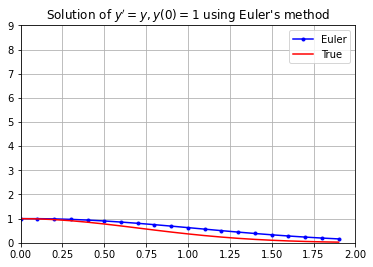

In [46]:
y0 = 1

f = lambda y,t: -t*y

t,y = odeEuler(f,y0,0,2)

y_true = 1*np.exp(-t**2)

plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$ using Euler's method")
plt.show()

## Euler's Midpoint Method


We first find the value at midpoint

$y_{i+1/2} = y_{i} + f(x_i,y_i) \frac{h}{2}$

Then use this to improve the next value:

$y_{i+1} = y_{i} + f(x_{i+1/2},y_{i+1/2})$ 

In [35]:
def odeEulermid(f,y0,t0,tf,h=0.1):
    
    t = np.arange(t0,tf,h)
    
    y = np.zeros(len(t))
    y[0] = y0
    
    for n in range(0,len(t)-1):
        
        yhalf = y[n] + f(y[n],t[n])*(h/2)
        thalf = t[n] + (h/2)
        
        y[n+1] = y[n] + f(yhalf,thalf)*h
    return t,y

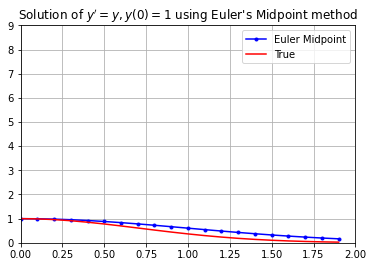

In [41]:

y0 = 1

f = lambda y,t: -t*y

t,y = odeEulermid(f,y0,0,2)

y_true = 1*np.exp(-t**2)

plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler Midpoint','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$ using Euler's Midpoint method")
plt.show()

## Runge-Kutta 4th order method


$$k_1 = f(t_n,y_n)$$
$$k_2 = f(t_n +h/2,y_n + h k_1/2)$$
$$k_3 = f(t_n+h/2,y_n+h k_2/2)$$
$$k_4 = f(t_n+h,y_n+h k_3)$$

Using these,

$$t_{n+1} = t_n +h$$
$$y_{n+1} = y_{n} + \frac{1}{6}(k_1+2k_2+2k_3+k_4)$$

In [52]:
def RK4(f,y0,t0,tf,h=0.1):
    
    t = np.arange(t0,tf,h)
    
    y = np.zeros(len(t))
    y[0] = y0
    
    for n in range(0,len(t)-1):
        
        k1 = f(y[n],t[n])
        
        k2 = f(y[n]+h* k1/2.0,t[n]+h/2.0)
        k3 = f(y[n]+h* k2/2.0,t[n]+h/2.0)
        k4 = f(y[n]+h*k3,t[n]+h)
    
        
        y[n+1] = y[n] + (1.0/6.0)*h*(k1+2*k2+2*k3+k4)
        
    return t,y

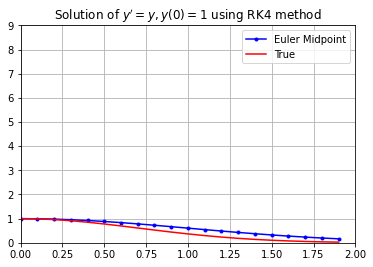

In [53]:
y0 = 1

f = lambda y,t: -t*y

t,y = RK4(f,y0,0.0,2)

y_true = 1*np.exp(-t**2)

plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler Midpoint','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=-t1$ using RK4 method")
plt.show()

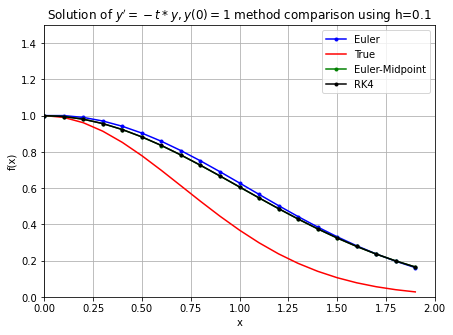

In [88]:
t1,y1 = odeEuler(f,y0,0,2,0.1)
t2,y2 = odeEulermid(f,y0,0,2,0.1)
t3,y3 = RK4(f,y0,0.0,2,0.1)

y_true = 1*np.exp(-t**2)

plt.figure(figsize=[7,5])
plt.plot(t1,y1,'b.-',t,y_true,'r-',t2,y2,'g.-',t3,y3,'k.-')
plt.legend(['Euler','True','Euler-Midpoint','RK4'])
plt.axis([0,2,0,1.5])
plt.grid(True)
plt.title("Solution of $y'=-t*y , y(0)=1$ method comparison using h=0.1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("Allmethodscomparison.pdf")
plt.show()

## Plotting the Error 

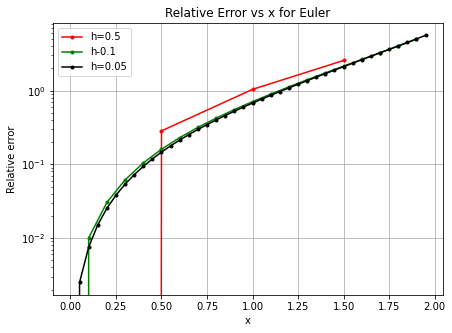

In [94]:
t1,y1 = odeEuler(f,y0,0,2,0.5)
t2,y2 = odeEuler(f,y0,0,2,0.1)
t3,y3 = odeEuler(f,y0,0,2,0.05)

ytrue1 = 1*np.exp(-t1**2)
ytrue2 = 1*np.exp(-t2**2)
ytrue3 = 1*np.exp(-t3**2)

plt.figure(figsize=[7,5])
plt.semilogy(t1,(y1-ytrue1)/ytrue1,'r.-',t2,(y2-ytrue2)/ytrue2,'g.-',t3,(y3-ytrue3)/ytrue3,'k.-')

plt.legend(['h=0.5','h-0.1','h=0.05'])
plt.grid(True)
plt.title("Relative Error vs x for Euler")
plt.xlabel("x")
plt.ylabel("Relative error")
plt.savefig("relerrormeuler.pdf")
plt.show()

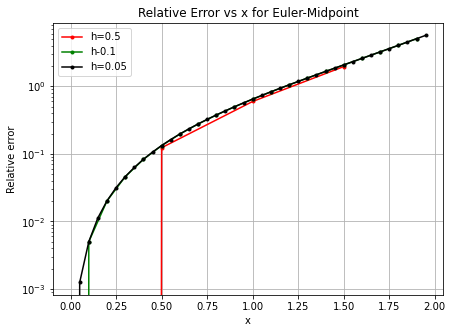

In [95]:
t1,y1 = odeEulermid(f,y0,0,2,0.5)
t2,y2 = odeEulermid(f,y0,0,2,0.1)
t3,y3 = odeEulermid(f,y0,0,2,0.05)

ytrue1 = 1*np.exp(-t1**2)
ytrue2 = 1*np.exp(-t2**2)
ytrue3 = 1*np.exp(-t3**2)



plt.figure(figsize=[7,5])
plt.semilogy(t1,(y1-ytrue1)/ytrue1,'r.-',t2,(y2-ytrue2)/ytrue2,'g.-',t3,(y3-ytrue3)/ytrue3,'k.-')

plt.legend(['h=0.5','h-0.1','h=0.05'])
plt.grid(True)
plt.title("Relative Error vs x for Euler-Midpoint")
plt.xlabel("x")
plt.ylabel("Relative error")
plt.savefig("relerroreulermid.pdf")
plt.show()

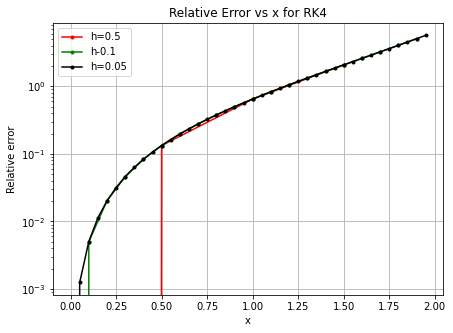

In [96]:
t1,y1 = RK4(f,y0,0,2,0.5)
t2,y2 = RK4(f,y0,0,2,0.1)
t3,y3 = RK4(f,y0,0,2,0.05)

ytrue1 = 1*np.exp(-t1**2)
ytrue2 = 1*np.exp(-t2**2)
ytrue3 = 1*np.exp(-t3**2)


plt.figure(figsize=[7,5])
plt.semilogy(t1,(y1-ytrue1)/ytrue1,'r.-',t2,(y2-ytrue2)/ytrue2,'g.-',t3,(y3-ytrue3)/ytrue3,'k.-')

plt.legend(['h=0.5','h-0.1','h=0.05'])
plt.grid(True)
plt.title("Relative Error vs x for RK4")
plt.xlabel("x")
plt.ylabel("Relative error")
plt.savefig("relerrorrk4.pdf")
plt.show()